In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Figure for changing means

In [2]:
res_df = pd.read_csv("../results/20200321_truth_means.csv")
res_df = res_df[res_df.mean_delta != 0]

res_df2 = pd.read_csv("../results/20200320_weighted_correct_nodes.csv")
res_df2.fillna(0, inplace=True)
res_df2 = res_df2[res_df2.mean_delta != 0]

Text(-0.05, 0.75, 'Precision')

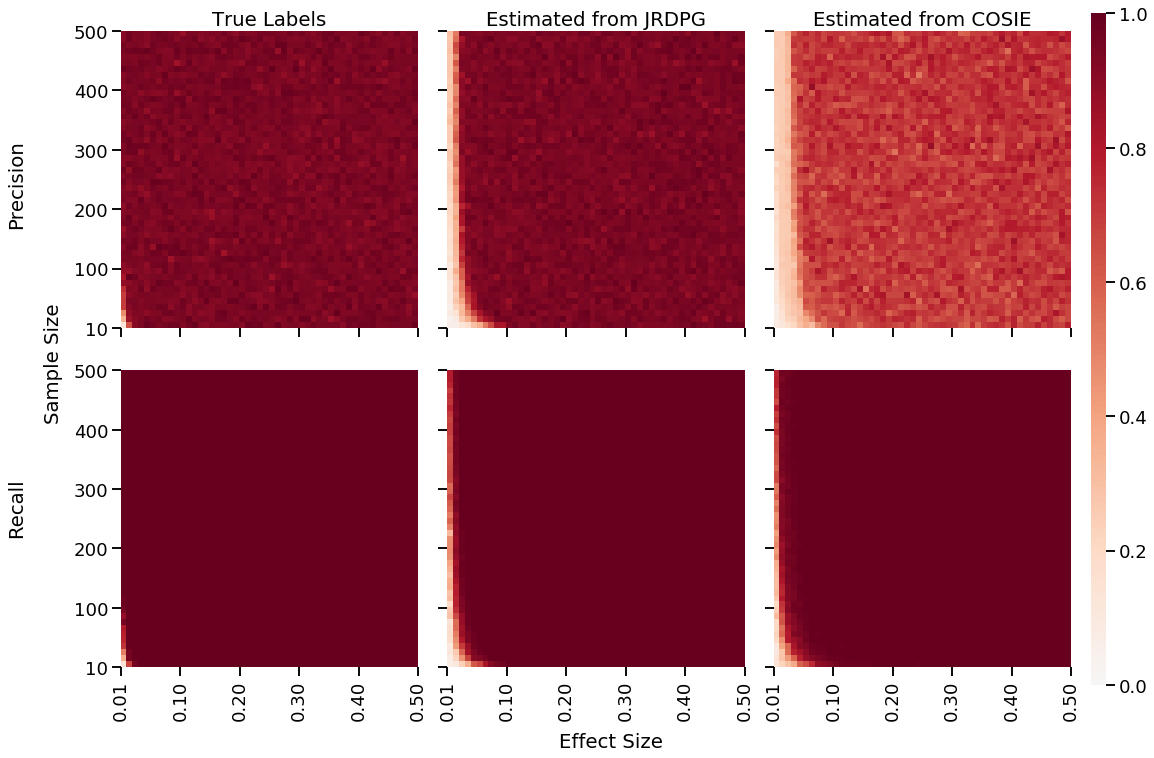

In [3]:
sns.set_context('talk', font_scale=1.1)
xticklabels = np.linspace(0, 1 - .5, 50 + 1)[::10]
xticklabels[0] += 0.01
yticklabels = np.linspace(0, 250, 50 + 1)[::10] * 2
yticklabels[0] += 10

fig, ax = plt.subplots(
    nrows=2, 
    ncols=4, 
    figsize=(15, 10), 
    sharex=True,
    sharey=True,
    constrained_layout=True,
    gridspec_kw={"width_ratios": [1, 1, 1, 0.05]},
)
gs = ax[-1, -1].get_gridspec()
for ax_ in ax[:, -1]:
    ax_.remove()
ax_leg = fig.add_subplot(gs[:, -1])

# For truth labels
for i, metric in enumerate(["omni_precision_ks_2samp", "omni_recall_ks_2samp"]):
    sns.heatmap(
        np.flipud(res_df[metric].values.reshape(50, -1)),
        ax=ax[i, 0],
        square=True,
        center=0,
        cmap="RdBu_r",
        cbar_kws=dict(shrink=0.7),
        xticklabels=["{:.2f}".format(x) for x in xticklabels],
        yticklabels=["{:.0f}".format(y) for y in yticklabels],
        cbar_ax=ax_leg,
        vmin=0,
        vmax=1,
    )
    ax[i, 0].set_xticks(np.arange(0, ax[0, 0].get_xlim()[1] + 1, 10))
    ax[i, 0].set_yticks(np.arange(0, ax[0, 0].get_ylim()[0] + 1, 10)[::-1])

    
# For estimated labels
cols = ["omni", "mase"]
rows = ["_precision_", "_recall_"]
for i, metric in enumerate(rows):
    for j, method in enumerate(cols):
        sns.heatmap(
            np.flipud(res_df2[f"{method}{metric}2_ks_2samp"].values.reshape(50, -1)),
            ax=ax[i, j+1],
            square=True,
            center=0,
            cmap="RdBu_r",
            cbar_kws=dict(shrink=0.7),
            xticklabels=["{:.2f}".format(x) for x in xticklabels],
            yticklabels=["{:.0f}".format(y) for y in yticklabels],
            cbar_ax=ax_leg,
            vmin=0,
            vmax=1,
        )
        ax[i, j+1].set_xticks(np.arange(0, ax[0, 0].get_xlim()[1] + 1, 10))
        ax[i, j+1].set_yticks(np.arange(0, ax[0, 0].get_ylim()[0] + 1, 10)[::-1])
        
ax[0, 0].set_title("True Labels")
ax[0, 1].set_title("Estimated from JRDPG")
ax[0, 2].set_title("Estimated from COSIE")

fig.text(-0.025, 0.5, "Sample Size", va="center", rotation="vertical")
fig.text(0.5, -0.025, "Effect Size", va="center", ha="center")
fig.text(-0.05, .3, "Recall", va="center", ha="center", rotation="vertical")
fig.text(-0.05, .75, "Precision", va="center", ha="center", rotation="vertical")

In [4]:
fig.savefig(
        f"./exp4_means_final.png", dpi=300, bbox_inches="tight"
)
fig.savefig(
    f"./exp4_means_final.pdf", dpi=300, bbox_inches="tight"
)

## Figure for changing variances

In [2]:
res_df = pd.read_csv("../results/20200321_truth_vars.csv")
res_df = res_df[res_df.var_delta != 0]

res_df2 = pd.read_csv("../results/20200321_weighted_correct_nodes.csv")
res_df2 = res_df2.sort_values(['m', 'var_delta'])
res_df2 = res_df2[res_df2.var_delta != 0.1]

Text(-0.05, 0.75, 'Precision')

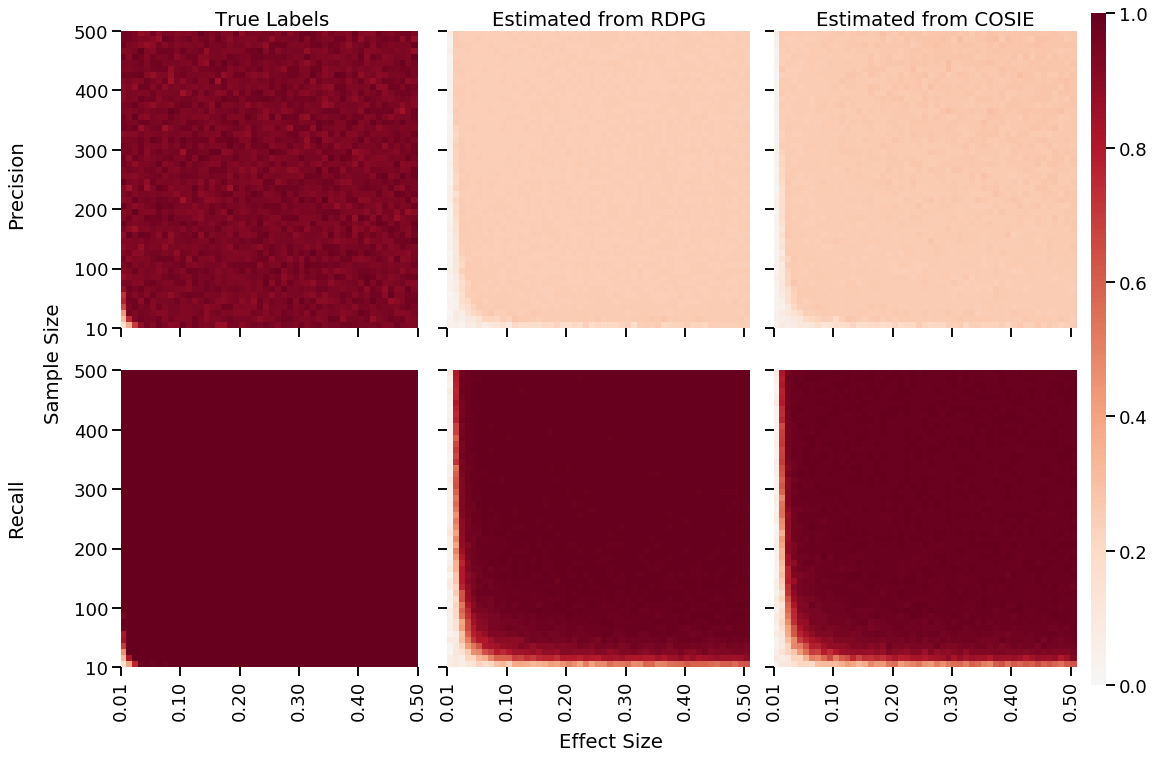

In [3]:
sns.set_context('talk', font_scale=1.1)
xticklabels = np.linspace(0, 1 - .5, 50 + 1)[::10]
xticklabels[0] += 0.01
yticklabels = np.linspace(0, 250, 50 + 1)[::10] * 2
yticklabels[0] += 10

fig, ax = plt.subplots(
    nrows=2, 
    ncols=4, 
    figsize=(15, 10), 
    sharex=True,
    sharey=True,
    constrained_layout=True,
    gridspec_kw={"width_ratios": [1, 1, 1, 0.05]},
)
gs = ax[-1, -1].get_gridspec()
for ax_ in ax[:, -1]:
    ax_.remove()
ax_leg = fig.add_subplot(gs[:, -1])

# For truth labels
for i, metric in enumerate(["omni_precision_ks_2samp", "omni_recall_ks_2samp"]):
    sns.heatmap(
        np.flipud(res_df[metric].values.reshape(50, -1)),
        ax=ax[i, 0],
        square=True,
        center=0,
        cmap="RdBu_r",
        cbar_kws=dict(shrink=0.7),
        xticklabels=["{:.2f}".format(x) for x in xticklabels],
        yticklabels=["{:.0f}".format(y) for y in yticklabels],
        cbar_ax=ax_leg,
        vmin=0,
        vmax=1,
    )
    ax[i, 0].set_xticks(np.arange(0, ax[0, 0].get_xlim()[1] + 1, 10))
    ax[i, 0].set_yticks(np.arange(0, ax[0, 0].get_ylim()[0] + 1, 10)[::-1])

    
# For estimated labels
cols = ["omni", "mase"]
rows = ["_precision_", "_recall_"]
for i, metric in enumerate(rows):
    for j, method in enumerate(cols):
        sns.heatmap(
            np.flipud(res_df2[f"{method}{metric}2_ks_2samp"].values.reshape(50, -1)),
            ax=ax[i, j+1],
            square=True,
            center=0,
            cmap="RdBu_r",
            cbar_kws=dict(shrink=0.7),
            xticklabels=["{:.2f}".format(x) for x in xticklabels],
            yticklabels=["{:.0f}".format(y) for y in yticklabels],
            cbar_ax=ax_leg,
            vmin=0,
            vmax=1,
        )
        ax[i, j+1].set_xticks(np.arange(0, ax[0, 0].get_xlim()[1] + 1, 10))
        ax[i, j+1].set_yticks(np.arange(0, ax[0, 0].get_ylim()[0] + 1, 10)[::-1])
        
ax[0, 0].set_title("True Labels")
ax[0, 1].set_title("Estimated from RDPG")
ax[0, 2].set_title("Estimated from COSIE")

fig.text(-0.025, 0.5, "Sample Size", va="center", rotation="vertical")
fig.text(0.5, -0.025, "Effect Size", va="center", ha="center")
fig.text(-0.05, .3, "Recall", va="center", ha="center", rotation="vertical")
fig.text(-0.05, .75, "Precision", va="center", ha="center", rotation="vertical")

In [5]:
fig.savefig(
        f"./exp4_vars_final.png", dpi=300, bbox_inches="tight"
)
fig.savefig(
    f"./exp4_vars_final.pdf", dpi=300, bbox_inches="tight"
)